# Week 8 Tutorial

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
!pip install requests

In [6]:
def canny_auto(img, method, sigma=0.33):
    """Args:
    img: grayscale
    method: median, triangle and otsu
    sigma = 0.33 (default)"""
    if method == "median":
        Th = np.median(img)
        
    elif method == "triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
        
    elif method == "otsu":
        Th = cv.threshold(img, 0, 255, cv.THRESH_OTSU)[0]
        
    else:
        raise Exception("method specified not available!")
        
    lowThresh = (1-sigma) * Th
    highThresh = (1+sigma) * Th
    
    return cv.Canny(img, lowThresh, highThresh)

## Exercise 1

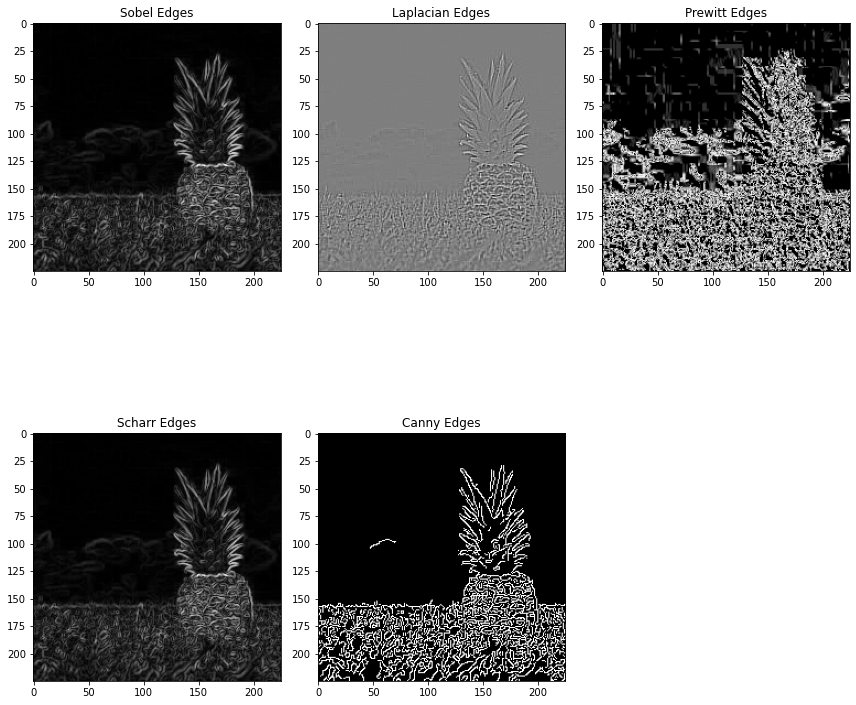

In [3]:
# Load the image
image_path = 'images/pineapple.jfif'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply Sobel edge detection
sobel_x = cv.Sobel(image, cv.CV_32F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image, cv.CV_32F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply Laplacian edge detection
laplacian_edges = cv.Laplacian(image, cv.CV_64F, ksize=3)

# Apply Prewitt edge detection
prewitt_x = cv.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Apply Scharr edge detection
scharr_x = cv.Scharr(image, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(image, cv.CV_32F, 0, 1)
scharr_edges = np.sqrt(scharr_x**2 + scharr_y**2)

# Apply Canny edge detection
canny_edges = cv.Canny(image, threshold1=100, threshold2=200)

# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edges')

plt.subplot(2, 3, 2)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edges')

plt.subplot(2, 3, 3)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edges')

plt.subplot(2, 3, 4)
plt.imshow(scharr_edges, cmap='gray')
plt.title('Scharr Edges')

plt.subplot(2, 3, 5)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')

plt.tight_layout()
plt.show()

## Exercise 2

In [7]:
img = cv.imread("images/electronic.jfif")

# resize -> grayscale -> bilateral -> Canny -> findContour -> Contour features
# sort the contour with respect to area in descending order
factor = 300 / img.shape[1]
img = cv.resize(img, None, fx = factor, fy = factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.bilateralFilter(gray, 7, 19, 13)
_, thresholded = cv.threshold(blur, 220, 255, cv.THRESH_BINARY)

edge = canny_auto(blur, method = "triangle")

show_img("edges", edge)

contours, _ = cv.findContours(thresholded, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()

# rectangular contour
for c in contours:
    x, y, w, h = cv.boundingRect(c)
    if w > 30 and h > 30: 
        cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)  # D

show_img("contour", img_copy)

## Exercise 3

In [8]:
img = cv.imread("images/clock.jpg")

# resize -> grayscale -> bilateral -> Canny -> findContour -> Contour features
# start the contour with respect to area in descending order
factor = 300 / img.shape[1]
img = cv.resize(img, None, fx=factor, fy=factor)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.bilateralFilter(gray, 7, 19, 13)
edge = canny_auto(blur, method="triangle")

contours, _ = cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cnts = sorted(contours, key=cv.contourArea, reverse=True)[:5]
clock = None
img_copy = img.copy()
# rectangular contour
for c in cnts:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.1*peri, True)
    
    if len(approx) == 4:
        clock = c
        break

cv.drawContours(img_copy, [clock], -1, (0,255,0), 2)
show_img("contour", img_copy)